In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
df = pd.read_csv('train.csv' ,sep='|')
df

,id,job_title,location,salary_currency,career_level,experience_level,education_level,employment_type,job_function,job_benefits,company_process_time,company_size,company_industry,job_description,salary
0,9634,CLINIC Operation Manager,Sumatera Utara,IDR,Manajer/Asisten Manajer,5 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Layanan Kesehatan,Praktisi/Asisten Medis",NaN,NaN,1- 50 pekerja,Makanan & Minuman/Katering/Restoran,# must have good experiences in above field# e...,14000000.0
1,26646,Management Trainee,Aceh,IDR,Supervisor/Koordinator,1 tahun,"Sertifikat Professional, D3 (Diploma), D4 (Dip...",Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",Asuransi kesehatan;Bisnis (contoh: Kemeja),NaN,Lebih dari 5000 pekerja,Retail/Merchandise,Lowongan ini akan mengarahkan anda langsung ke...,NaN
2,23840,Creative Content Creator SEO,Semarang,IDR,Supervisor/Koordinator,2 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Digital Marketing",Bisnis (contoh: Kemeja);-,28 days,201 - 500 pekerja,Manufaktur/Produksi,KemampuanDapat membuat konten kreatif untuk pr...,NaN
3,15321,Supervisor Sales General Trade,Surabaya,IDR,Supervisor/Koordinator,2 tahun,Sarjana (S1),Penuh Waktu,"Penjualan / Pemasaran,Penjualan Ritel",Tip;Asuransi kesehatan;Penglihatan;Waktu regul...,27 days,501 - 1000 pekerja,Produk Konsumen/Barang konsumen yang bergerak ...,Job DescriptionWorking with company target and...,NaN
4,13672,Compensation & Benefit (Payroll) SPV,Jakarta Barat,IDR,Supervisor/Koordinator,4 tahun,Sarjana (S1),Kontrak,"Sumber Daya Manusia/Personalia,Sumber Daya Man...",Asuransi kesehatan;Formil (contoh: Kemeja + Da...,19 days,51 - 200 pekerja,Automobil/Mesin Tambahan Automotif/Kendaraan,JOB DESCRIPTION· Manage external client...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25391,11690,Translator Mandarin,Jawa Timur,IDR,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,NaN,Sarjana (S1),Penuh Waktu,"Lainnya,Jurnalis/Editor","Waktu regular, Senin - Jumat;Bisnis (contoh: K...",29 days,51 - 200 pekerja,Manufaktur/Produksi,Pendidikan Minimal S1Lancar berbahasa mandarin...,7500000.0
25392,19877,Staff Admin Accounting,Jakarta Utara,IDR,Pegawai (non-manajemen & non-supervisor),2 tahun,"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan","Asuransi kesehatan;Waktu regular, Senin - Juma...",NaN,1- 50 pekerja,Elektrikal & Elektronik,SYARAT KEAHLIAN:Melakukan data entry kas dan b...,NaN
25393,2178,Web Developer,Jakarta Selatan,IDR,Supervisor/Koordinator,2 tahun,Sarjana (S1),Penuh Waktu,"Komputer/Teknologi Informasi,IT-Perangkat Lunak",NaN,NaN,NaN,Manufaktur/Produksi,WEB DEVELOPER (Placement : Jakarta)The ideal c...,6000000.0
25394,11750,CFO - Fintech Sharia,Jakarta Raya,IDR,CEO/GM/Direktur/Manajer Senior,15 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",Penuh Waktu,"Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan",NaN,30 days,51 - 200 pekerja,Manajemen/Konsulting HR,"The CFO will be report directly to CEO, in cha...",NaN


In [317]:
df.isna().sum()

id                          0
job_title                   0
location                    0
salary_currency             3
career_level                0
experience_level         3402
education_level             0
employment_type          1051
job_function                0
job_benefits             5258
company_process_time     7246
company_size             4078
company_industry         1174
job_description             0
salary                  20315
dtype: int64

In [318]:
df.drop(columns=['id', 'job_title', 'location', 'salary_currency', 'job_function', 'job_benefits',
                 'company_process_time', 'company_industry', 'job_description', 'education_level'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25396 entries, 0 to 25395
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   career_level      25396 non-null  object 
 1   experience_level  21994 non-null  object 
 2   employment_type   24345 non-null  object 
 3   company_size      21318 non-null  object 
 4   salary            5081 non-null   float64
dtypes: float64(1), object(4)
memory usage: 992.2+ KB


In [319]:
df.isnull().sum()
# data = df.dropna(subset=['salary'])
# data.isna().sum()
# df_train = df[df['salary'].isnull()]
# df_train.info()
# df_train.drop(columns=['salary'], inplace=True)
# df_train.info()

career_level            0
experience_level     3402
employment_type      1051
company_size         4078
salary              20315
dtype: int64

In [320]:
df['career_level'].value_counts()

career_level
Pegawai (non-manajemen & non-supervisor)             14072
Supervisor/Koordinator                                4770
Manajer/Asisten Manajer                               3363
Lulusan baru/Pengalaman kerja kurang dari 1 tahun     1747
Tidak Terspesifikasi                                  1099
CEO/GM/Direktur/Manajer Senior                         345
Name: count, dtype: int64

In [321]:
data = df[df['career_level'] != 'Tidak Terspesifikasi']


In [322]:
data['career_level'].value_counts()

career_level
Pegawai (non-manajemen & non-supervisor)             14072
Supervisor/Koordinator                                4770
Manajer/Asisten Manajer                               3363
Lulusan baru/Pengalaman kerja kurang dari 1 tahun     1747
CEO/GM/Direktur/Manajer Senior                         345
Name: count, dtype: int64

In [323]:

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['career_level'], return_df=True,
                            mapping=[{'col':'career_level','mapping':{'Lulusan baru/Pengalaman kerja kurang dari 1 tahun': 0,
                                                                  'Pegawai (non-manajemen & non-supervisor)': 1,
                                                                  'Supervisor/Koordinator': 2,
                                                                  'Manajer/Asisten Manajer': 3,
                                                                  'CEO/GM/Direktur/Manajer Senior': 4}
}])
df_encoded = encoder.fit_transform(data)
print(df_encoded.info())
data = df_encoded
data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 24297 entries, 0 to 25395
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   career_level      24297 non-null  int32  
 1   experience_level  21994 non-null  object 
 2   employment_type   24297 non-null  object 
 3   company_size      20535 non-null  object 
 4   salary            5081 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 1.0+ MB
None


,career_level,experience_level,employment_type,company_size,salary
0,3,5 tahun,Penuh Waktu,1- 50 pekerja,14000000.0
1,2,1 tahun,Penuh Waktu,Lebih dari 5000 pekerja,NaN
2,2,2 tahun,Penuh Waktu,201 - 500 pekerja,NaN
3,2,2 tahun,Penuh Waktu,501 - 1000 pekerja,NaN
4,2,4 tahun,Kontrak,51 - 200 pekerja,NaN


In [324]:
data['career_level'].value_counts()

career_level
1    14072
2     4770
3     3363
0     1747
4      345
Name: count, dtype: int64

In [325]:
data['experience_level'].value_counts()

experience_level
1 tahun                7882
2 tahun                6111
3 tahun                4052
5 tahun                2355
4 tahun                 696
10 tahun                293
7 tahun                 207
8 tahun                 178
6 tahun                 120
15 tahun                 51
12 tahun                 23
9 tahun                  10
20 tahun                  7
16 tahun                  3
Lebih dari 20 Tahun       2
17 tahun                  1
11 tahun                  1
13 tahun                  1
14 tahun                  1
Name: count, dtype: int64

In [326]:
data = data[data['experience_level'] != 'Lebih dari 20 Tahun']
data['experience_level'].value_counts()

experience_level
1 tahun     7882
2 tahun     6111
3 tahun     4052
5 tahun     2355
4 tahun      696
10 tahun     293
7 tahun      207
8 tahun      178
6 tahun      120
15 tahun      51
12 tahun      23
9 tahun       10
20 tahun       7
16 tahun       3
17 tahun       1
11 tahun       1
13 tahun       1
14 tahun       1
Name: count, dtype: int64

In [327]:


# Mapping string ke integer
mapping = {
    '1 tahun': 1, '2 tahun': 2, '3 tahun': 3, '4 tahun': 4, '5 tahun': 5,
    '6 tahun': 6, '7 tahun': 7, '8 tahun': 8, '9 tahun': 9, '10 tahun': 10,
    '11 tahun': 11, '12 tahun': 12, '13 tahun': 13, '14 tahun': 14,
    '15 tahun': 15, '16 tahun': 16, '17 tahun': 17, '20 tahun': 20
}

# Konversi kolom ke tipe data integer
data['experience_level'] = data['experience_level'].map(mapping)

# Tampilkan hasil
data['experience_level'].value_counts()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4580\4124648695.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['experience_level'] = data['experience_level'].map(mapping)


experience_level
1.0     7882
2.0     6111
3.0     4052
5.0     2355
4.0      696
10.0     293
7.0      207
8.0      178
6.0      120
15.0      51
12.0      23
9.0       10
20.0       7
16.0       3
17.0       1
11.0       1
13.0       1
14.0       1
Name: count, dtype: int64

In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24295 entries, 0 to 25395
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   career_level      24295 non-null  int32  
 1   experience_level  21992 non-null  float64
 2   employment_type   24295 non-null  object 
 3   company_size      20533 non-null  object 
 4   salary            5081 non-null   float64
dtypes: float64(2), int32(1), object(2)
memory usage: 1.0+ MB


In [329]:
data['employment_type'].value_counts()

employment_type
Penuh Waktu                 20817
Kontrak                      3023
Paruh Waktu                   200
Magang                        140
Temporer                       81
Penuh Waktu, Kontrak           30
Temporer, Magang                2
Penuh Waktu, Paruh Waktu        1
Penuh Waktu, Magang             1
Name: count, dtype: int64

In [330]:
values_to_drop = [
    'Penuh Waktu, Kontrak',
    'Temporer, Magang',
    'Penuh Waktu, Paruh Waktu',
    'Penuh Waktu, Magang'
]
data = data[~data['employment_type'].isin(values_to_drop)]
data['employment_type'].value_counts()

employment_type
Penuh Waktu    20817
Kontrak         3023
Paruh Waktu      200
Magang           140
Temporer          81
Name: count, dtype: int64

In [331]:

# Mapping ordinal
mapping = {
    'Penuh Waktu': 4,
    'Kontrak': 3,
    'Paruh Waktu': 2,
    'Temporer': 1,
    'Magang': 0,
}

# Konversi kolom ke tipe data integer
data['employment_type'] = data['employment_type'].map(mapping)

# Tampilkan hasil
print(data['employment_type'].value_counts())

employment_type
4    20817
3     3023
2      200
0      140
1       81
Name: count, dtype: int64


In [332]:
data['company_size'].value_counts()

company_size
51 - 200 pekerja           5397
1- 50 pekerja              3783
201 - 500 pekerja          3131
501 - 1000 pekerja         2505
Lebih dari 5000 pekerja    2025
2001 - 5000 pekerja        1897
1001 - 2000 pekerja        1772
Name: count, dtype: int64

In [333]:
import pandas as pd

# Mapping ordinal
mapping = {
    '1- 50 pekerja': 1,
    '51 - 200 pekerja': 2,
    '201 - 500 pekerja': 3,
    '501 - 1000 pekerja': 4,
    '1001 - 2000 pekerja': 5,
    '2001 - 5000 pekerja': 6,
    'Lebih dari 5000 pekerja': 7
}

# Konversi kolom 'company_size' ke tipe data integer menggunakan mapping
data['company_size'] = data['company_size'].map(mapping)

# Tampilkan hasil
data['company_size'].value_counts()

company_size
2.0    5397
1.0    3783
3.0    3131
4.0    2505
7.0    2025
6.0    1897
5.0    1772
Name: count, dtype: int64

In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24261 entries, 0 to 25395
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   career_level      24261 non-null  int32  
 1   experience_level  21962 non-null  float64
 2   employment_type   24261 non-null  int64  
 3   company_size      20510 non-null  float64
 4   salary            5076 non-null   float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 1.0 MB


In [335]:
data.describe()

,career_level,experience_level,employment_type,company_size,salary
count,24261.000000,21962.000000,24261.000000,20510.000000,5.076000e+03
mean,1.443757,2.488935,3.825811,3.335300,7.084756e+06
std,0.867725,1.881269,0.499624,1.941275,5.813062e+06
min,0.000000,1.000000,0.000000,1.000000,1.000000e+01
25%,1.000000,1.000000,4.000000,2.000000,4.250000e+06
50%,1.000000,2.000000,4.000000,3.000000,5.500000e+06
75%,2.000000,3.000000,4.000000,5.000000,8.000000e+06
max,4.000000,20.000000,4.000000,7.000000,1.150000e+08


In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24261 entries, 0 to 25395
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   career_level      24261 non-null  int32  
 1   experience_level  21962 non-null  float64
 2   employment_type   24261 non-null  int64  
 3   company_size      20510 non-null  float64
 4   salary            5076 non-null   float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 1.0 MB


In [337]:
df_train = data[data['salary'].isnull()]
df_train.drop(columns=['salary'], inplace=True)
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19185 entries, 1 to 25395
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   career_level      19185 non-null  int32  
 1   experience_level  17298 non-null  float64
 2   employment_type   19185 non-null  int64  
 3   company_size      16170 non-null  float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 674.5 KB


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4580\194344872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['salary'], inplace=True)


In [338]:
model = data.dropna()

In [339]:
model.isna().sum()

career_level        0
experience_level    0
employment_type     0
company_size        0
salary              0
dtype: int64

In [340]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4026 entries, 0 to 25390
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   career_level      4026 non-null   int32  
 1   experience_level  4026 non-null   float64
 2   employment_type   4026 non-null   int64  
 3   company_size      4026 non-null   float64
 4   salary            4026 non-null   float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 173.0 KB


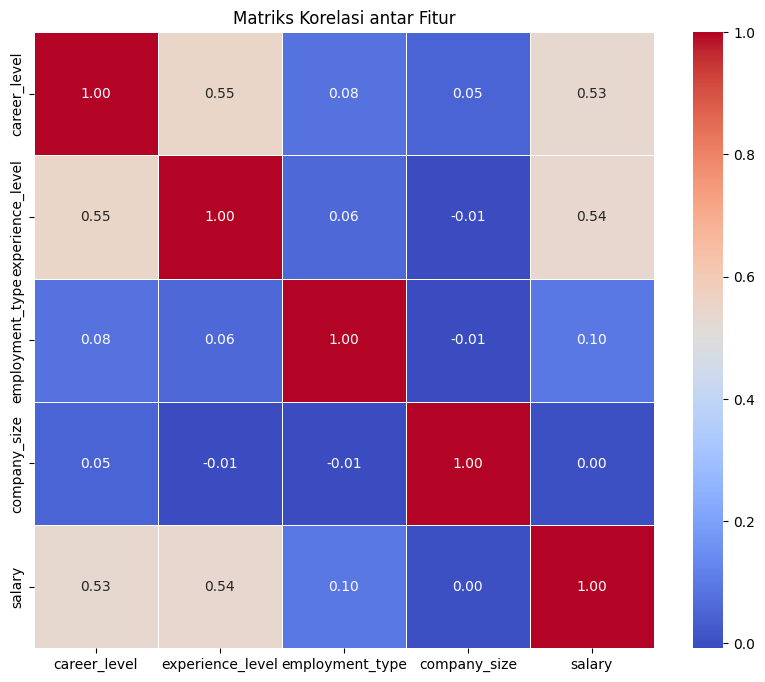

In [341]:
correlation_matrix = model.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi antar Fitur')
plt.show()

In [342]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19185 entries, 1 to 25395
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   career_level      19185 non-null  int32  
 1   experience_level  17298 non-null  float64
 2   employment_type   19185 non-null  int64  
 3   company_size      16170 non-null  float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 674.5 KB


In [343]:
x_pred = df_train.drop(columns=['company_size', 'employment_type'])
x_pred.dropna(inplace=True)
x_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17298 entries, 1 to 25395
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   career_level      17298 non-null  int32  
 1   experience_level  17298 non-null  float64
dtypes: float64(1), int32(1)
memory usage: 337.9 KB


In [344]:
model = model.drop(columns=['company_size', 'employment_type'])
model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4026 entries, 0 to 25390
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   career_level      4026 non-null   int32  
 1   experience_level  4026 non-null   float64
 2   salary            4026 non-null   float64
dtypes: float64(2), int32(1)
memory usage: 110.1 KB


In [346]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


# Pisahkan fitur dan target
X = model[['career_level', 'experience_level']]
y = model['salary']

# Inisialisasi model regresi linear
lr = LinearRegression()
scaler = StandardScaler()
x_train = scaler.fit_transform(X)
x_preds = scaler.transform(x_pred)

# Latih model menggunakan data latih
lr.fit(x_train, y)

# Prediksi menggunakan data uji
y_pred = lr.predict(x_preds)

y_pred


AttributeError: 'LinearRegression' object has no attribute 'fit_predict'

In [348]:
lr.fit(x_preds, y_pred)

LinearRegression()

In [351]:
df_predict = pd.read_csv('predict_case.csv', sep='|')
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1271 non-null   int64 
 1   job_title             1271 non-null   object
 2   location              1271 non-null   object
 3   salary_currency       1271 non-null   object
 4   career_level          1271 non-null   object
 5   experience_level      1151 non-null   object
 6   education_level       1271 non-null   object
 7   employment_type       1271 non-null   object
 8   job_function          1271 non-null   object
 9   job_benefits          933 non-null    object
 10  company_process_time  816 non-null    object
 11  company_size          1063 non-null   object
 12  company_industry      1235 non-null   object
 13  job_description       1271 non-null   object
dtypes: int64(1), object(13)
memory usage: 139.1+ KB


In [352]:
df_predict.drop(columns=['job_title', 'location', 'salary_currency', 'job_function', 'job_benefits',
                 'company_process_time', 'company_industry', 'job_description', 'education_level', 
                 'employment_type', 'company_size'], inplace=True)
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1271 non-null   int64 
 1   career_level      1271 non-null   object
 2   experience_level  1151 non-null   object
dtypes: int64(1), object(2)
memory usage: 29.9+ KB


In [353]:

# Mapping string ke integer
mapping = {
    '1 tahun': 1, '2 tahun': 2, '3 tahun': 3, '4 tahun': 4, '5 tahun': 5,
    '6 tahun': 6, '7 tahun': 7, '8 tahun': 8, '9 tahun': 9, '10 tahun': 10,
    '11 tahun': 11, '12 tahun': 12, '13 tahun': 13, '14 tahun': 14,
    '15 tahun': 15, '16 tahun': 16, '17 tahun': 17, '20 tahun': 20
}

# Konversi kolom ke tipe data integer
df_predict['experience_level'] = df_predict['experience_level'].map(mapping)

# Tampilkan hasil
df_predict['experience_level'].value_counts()


experience_level
1.0     388
2.0     368
3.0     222
5.0     118
4.0      21
10.0     19
8.0       6
6.0       4
7.0       4
15.0      1
Name: count, dtype: int64

In [354]:
encoder = ce.OrdinalEncoder(cols=['career_level'], return_df=True,
                            mapping=[{'col':'career_level','mapping':{'Lulusan baru/Pengalaman kerja kurang dari 1 tahun': 0,
                                                                  'Pegawai (non-manajemen & non-supervisor)': 1,
                                                                  'Supervisor/Koordinator': 2,
                                                                  'Manajer/Asisten Manajer': 3,
                                                                  'CEO/GM/Direktur/Manajer Senior': 4}
}])
df_encoded = encoder.fit_transform(df_predict)
print(df_encoded.info())
df_predict = df_encoded
df_predict.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1271 non-null   int64  
 1   career_level      1271 non-null   int32  
 2   experience_level  1151 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 25.0 KB
None


,id,career_level,experience_level
0,13973,0,NaN
1,12830,3,3.0
2,25858,3,5.0
3,24089,1,1.0
4,2140,3,5.0


In [356]:
df_predict['experience_level'].fillna(df_predict['experience_level'].median(), inplace=True)
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1271 non-null   int64  
 1   career_level      1271 non-null   int32  
 2   experience_level  1271 non-null   float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 25.0 KB
